<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week9/Week9_Keras_WalkThrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BASIC WALK THROUGH FOR MNIST NN
# BASED ON KERAS TUTORIALS (2019)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# OBTAIN

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# SCRUB
# FLATTEN 28 x 28 IMAGE TO 784 VECTOR
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# SCRUB
# NORMALIZE INPUTS FROM RGB COLOR TO 0-1
X_train = X_train / 255
X_test = X_test / 255

In [0]:
# SCRUB
# THE OLD ONE HOT ENCODE - CONVERT "CATEGORICAL" CLASSIFICATION TO ENCODE
# A "BINARIZATION" OF THE CATEGORIES
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# MODEL
# BUILD THE BASELINE

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

The following code actually runs the model - notice small number of epochs & lack of auto-stopping rule!

NOTE:  This is where the GPU comes in handy - running on CPU will take about 1,000 seconds - not bad but switching the runtime to GPU should bring the runtime down to ~ 120 secs!

In [7]:
# MODEL
# RUN THE MODEL

model = baseline_model()

# FIT THE MODEL
# STORE THE MODEL RESULTS IN history TO USE FOR BUILDING ROC PLOT

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
 - 3s - loss: 0.5089 - accuracy: 0.8594 - val_loss: 0.2361 - val_accuracy: 0.9318
Epoch 2/300
 - 2s - loss: 0.2040 - accuracy: 0.9430 - val_loss: 0.1715 - val_accuracy: 0.9517
Epoch 3/300
 - 2s - loss: 0.1485 - accuracy: 0.9587 - val_loss: 0.1342 - val_accuracy: 0.9616
Epoch 4/300
 - 2s - loss: 0.1142 - accuracy: 0.9680 - val_loss: 0.1112 - val_accuracy: 0.9684
Epoch 5/300
 - 2s - loss: 0.0916 - accuracy: 0.9750 - val_loss: 0.0997 - val_accuracy: 0.9702
Epoch 6/300
 - 2s - loss: 0.0763 - accuracy: 0.9792 - val_loss: 0.0894 - val_accuracy: 0.9741
Epoch 7/300
 - 3s - loss: 0.0629 - accuracy: 0.9832 - val_loss: 0.0800 - val_accuracy: 0.9764
Epoch 8/300
 - 3s - loss: 0.0523 - accuracy: 0.9859 - val_loss: 0.0766 - val_accuracy: 0.9773
Epoch 9/300
 - 3s - loss: 0.0452 - accuracy: 0.9887 - val_loss: 0.0741 - val_accuracy: 0.9776
Epoch 10/300
 - 3s - loss: 0.0393 - accuracy: 0.9900 - val_loss: 0.0697 - val_accuracy: 0.9783
Epoch 11/

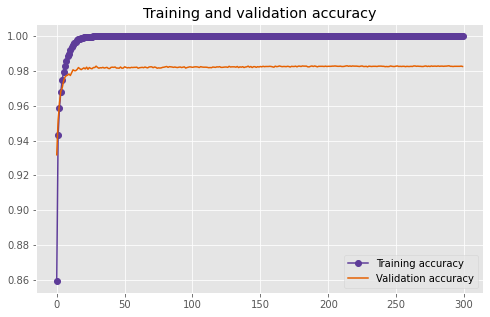

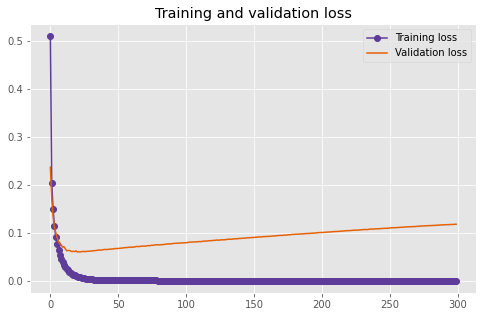

In [10]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)